# Regresja wielomianowa

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices

import matplotlib.pyplot as plt

# Zadanie 1
Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$,

**Wskazówka**: `smf.ols('y ~ x + I(x**k)', data_frame)` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [2]:
n = 100
x = stats.uniform.rvs(size = n,loc = -3, scale = 6)
eps = stats.norm.rvs(size = n, loc = 2,scale = 2)
y = x-2*(x**2)+0.5*(x**3)+eps

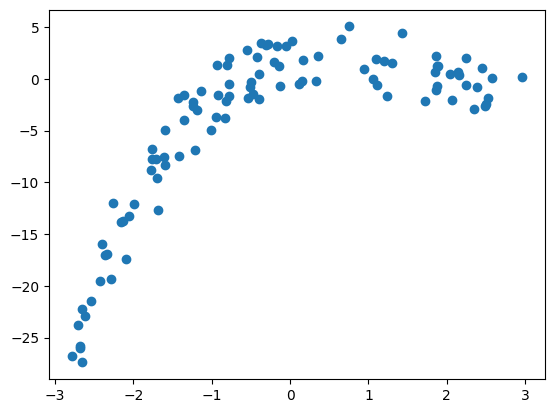

In [3]:
plt.scatter(x,y)
#zależność mocno nieliniowa

In [4]:
#regresja liniowa
X = sm.add_constant(x,prepend = True,has_constant = 'add')
model1 = sm.OLS(endog = y,exog = X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.04e-16
Time:                        23:16:53   Log-Likelihood:                -316.39
No. Observations:                 100   AIC:                             636.8
Df Residuals:                      98   BIC:                             642.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5030      0.587     -5.967      0.000      -4.668      -2.338
x1             3.5343      0.352     10.030      0.000       2.835       4.234
==============================================================================
Omnibus:                        6.509   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.971
Skew:                          -0.528   Prob(JB):                       0.0505
Kurtosis:                       2.437   Cond. No.                         1.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

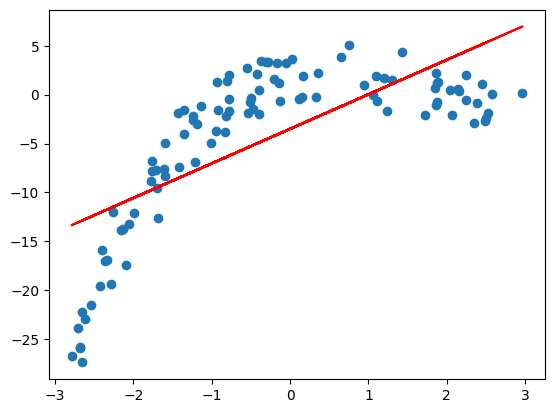

In [5]:
plt.scatter(x,y)
plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')
#regresja liniowa słabo się dopasowuje

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
#dopasowujemy wielomian stopnia 2
pol2 = PolynomialFeatures(degree = 2)
x.reshape(-1,1)
x2 = pol2.fit_transform(x.reshape(-1,1))
#na danych 1, x, x^2 dopasowujemy model liniowy (regresja wielomianowa) 
model2 = sm.OLS(endog = y,exog = x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     512.8
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.64e-52
Time:                        23:17:01   Log-Likelihood:                -229.27
No. Observations:                 100   AIC:                             464.5
Df Residuals:                      97   BIC:                             472.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4358      0.372      6.553      0.000       1.698       3.173
x1             3.4106      0.148     22.995      0.000       3.116       3.705
x2            -2.1521      0.101    -21.377      0.000      -2.352      -1.952
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.609
Skew:                           0.068   Prob(JB):                        0.737
Kurtosis:                       2.642   Cond. No.                         5.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

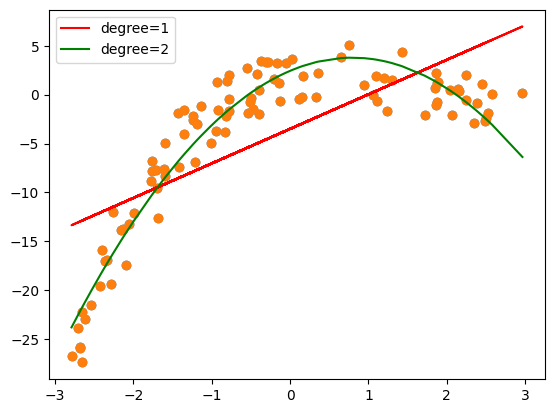

In [8]:
import operator
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')

#o wiele lepiej dopasowane, ale na ogonach mogłoby być lepiej
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')
plt.legend()

In [9]:
#alternatywna metoda regresji na 1, x, x^2
df = pd.DataFrame({'y':y,'x':x})
smf.ols('y~x+I(x**2)',df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     512.8
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.64e-52
Time:                        23:17:09   Log-Likelihood:                -229.27
No. Observations:                 100   AIC:                             464.5
Df Residuals:                      97   BIC:                             472.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4358      0.372      6.553      0.000       1.698       3.173
x              3.4106      0.148     22.995      0.000       3.116       3.705
I(x ** 2)     -2.1521      0.101    -21.377      0.000      -2.352      -1.952
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.609
Skew:                           0.068   Prob(JB):                        0.737
Kurtosis:                       2.642   Cond. No.                         5.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#teraz dla danych 1, x, x^2, x^3
pol3 = PolynomialFeatures(degree = 3)
x.reshape(-1,1)
x3 = pol3.fit_transform(x.reshape(-1,1))
model3 = sm.OLS(endog = y,exog = x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     559.3
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.21e-60
Time:                        23:17:11   Log-Likelihood:                -205.87
No. Observations:                 100   AIC:                             419.7
Df Residuals:                      96   BIC:                             430.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8039      0.307      5.871      0.000       1.194       2.414
x1             1.2181      0.313      3.894      0.000       0.597       1.839
x2            -1.9978      0.083    -24.172      0.000      -2.162      -1.834
x3             0.4465      0.059      7.568      0.000       0.329       0.564
==============================================================================
Omnibus:                        2.800   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.876
Skew:                          -0.114   Prob(JB):                        0.391
Kurtosis:                       2.369   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# teraz dla danych 1 ,x ,x^2, x^3,...,x^20
pol20 = PolynomialFeatures(degree = 20)
x.reshape(-1,1)
x20 = pol20.fit_transform(x.reshape(-1,1))
model20 = sm.OLS(endog = y,exog = x20).fit()
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     77.81
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.26e-43
Time:                        23:17:14   Log-Likelihood:                -200.20
No. Observations:                 100   AIC:                             442.4
Df Residuals:                      79   BIC:                             497.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4003      0.771      1.815      0.073      -0.135       2.936
x1            -3.9132      3.466     -1.129      0.262     -10.812       2.986
x2             1.3659     11.367      0.120      0.905     -21.259      23.991
x3            42.5257     21.371      1.990      0.050      -0.012      85.064
x4             0.9437     41.288      0.023      0.982     -81.237      83.125
x5           -91.3812     45.900     -1.991      0.050    -182.744      -0.019
x6           -16.1455     64.887     -0.249      0.804    -145.300     113.009
x7            90.0760     46.829      1.924      0.058      -3.135     183.287
x8            21.7012     54.288      0.400      0.690     -86.356     129.759
x9           -48.4715     26.309     -1.842      0.069    -100.838       3.895
x10          -13.1424     26.643     -0.493      0.623     -66.173      39.889
x11           15.4467      8.751      1.765      0.081      -1.972      32.865
x12            4.3920      8.032      0.547      0.586     -11.596      20.380
x13           -2.9938      1.767     -1.694      0.094      -6.511       0.523
x14           -0.8623      1.504     -0.573      0.568      -3.856       2.131
x15            0.3462      0.213      1.629      0.107      -0.077       0.769
x16            0.0991      0.170      0.582      0.562      -0.240       0.438
x17           -0.0219      0.014     -1.569      0.121      -0.050       0.006
x18           -0.0062      0.011     -0.579      0.564      -0.027       0.015
x19            0.0006      0.000      1.514      0.134      -0.000       0.001
x20            0.0002      0.000      0.567      0.572      -0.000       0.001
==============================================================================
Omnibus:                        1.801   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.774
Skew:                          -0.250   Prob(JB):                        0.412
Kurtosis:                       2.580   Cond. No.                     1.56e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

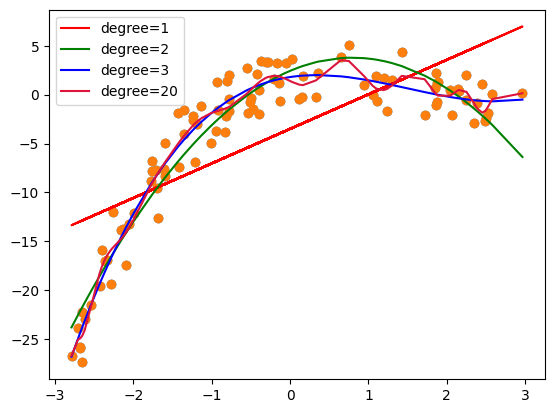

In [12]:
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'blue',label = 'degree=3')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'crimson',label = 'degree=20')
plt.legend()
#model 1,x,x^2,x^3 bardzo ładnie się dopasował
#model 1,x,x^2...,x^20 dopasował się aż za dobrze, mamy przeuczenie

### The Bias vs Variance trade-off

**Bias** (obciążenie) - odnosi się do błędu wynikającego z uproszczonych założeń modelu dotyczących dopasowania danych. Wysokie obciążenie oznacza, że model nie jest w stanie uchwycić wzorców w danych, co powoduje niedopasowanie/niedouczenie (ang. *under-fitting*).

**Variance** - odnosi się do błędu spowodowanego złożonym modelem próbującym dopasować dane. Duża wariancja oznacza, że model przechodzi przez większość punktów danych i powoduje nadmierne dopasowanie do danych (ang. *over-fitting).

Text(0.5, 0, 'Overfit\nLow bias\nHigh Variance')

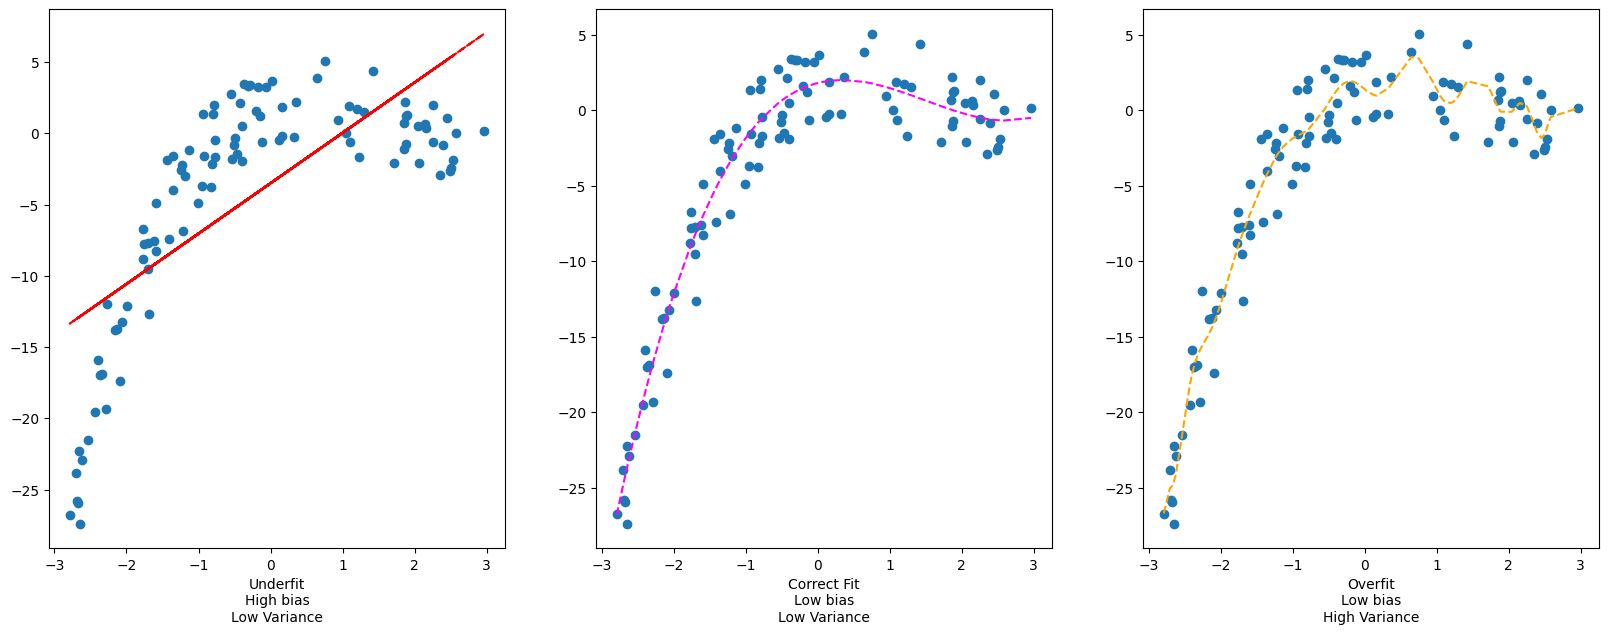

In [13]:
# liniowa underfit
# 1,x,x^2,x^3 bardzo dobre dopasowanie
# 1,x,x^2,...,x^20 overfit
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].scatter(x, y)
ax[0].plot(x, model1.fittedvalues, '--', color='red', label="degree=1")
ax[0].set_xlabel("Underfit\nHigh bias\nLow Variance")

sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[1].scatter(x, y)
ax[1].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
ax[1].set_xlabel("Correct Fit\nLow bias\nLow Variance")

sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[2].scatter(x, y)
ax[2].plot(x_range, y_poly_pred, '--', color='orange', label="degree=20")
ax[2].set_xlabel("Overfit\nLow bias\nHigh Variance")

# Zadanie 2
Wczytaj dane `amazon_salaries.csv` opisujące wysokość rocznych zarobków (`Salary`) w zależności od zajmowanego stanowiska (`Level`). 

Dopasuj model regresji liniowej oraz model regresji wielomianowej, znajdź najlepszy stopień wielomianu.

In [15]:
amazon_salary = pd.read_csv("amazon_salaries.csv")

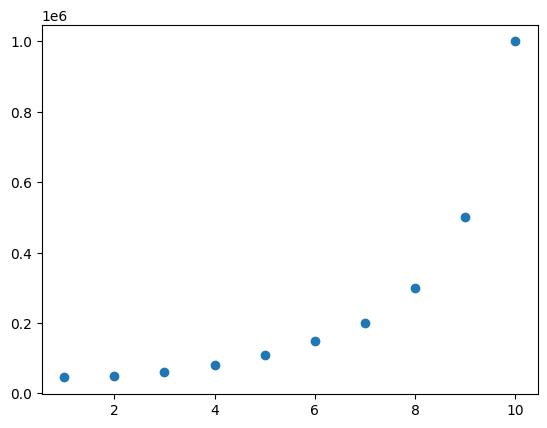

In [16]:
x = amazon_salary.Level
y = amazon_salary.Salary

plt.scatter(x, y)

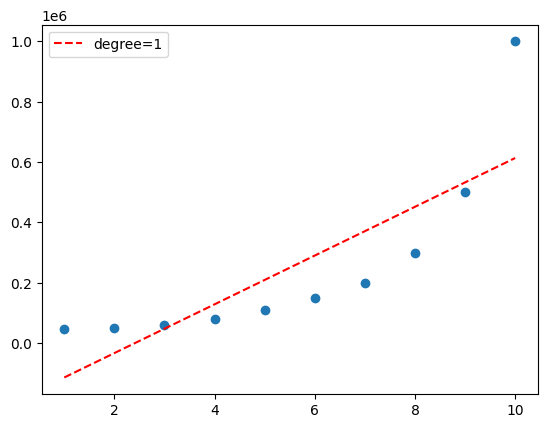

Degree=1, R2=0.6690412331929894


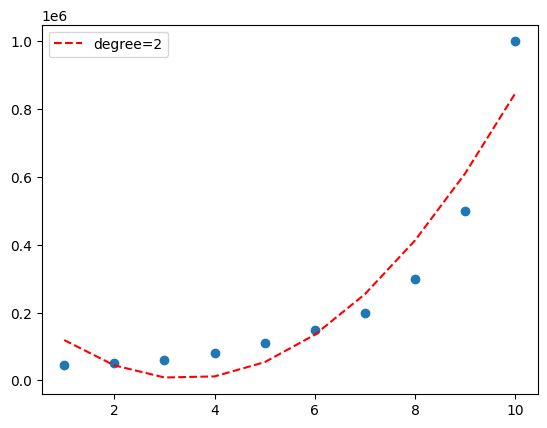

Degree=2, R2=0.9162082221443943


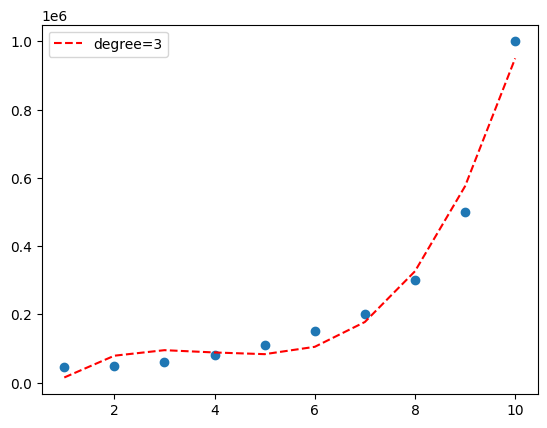

Degree=3, R2=0.9812097727913367


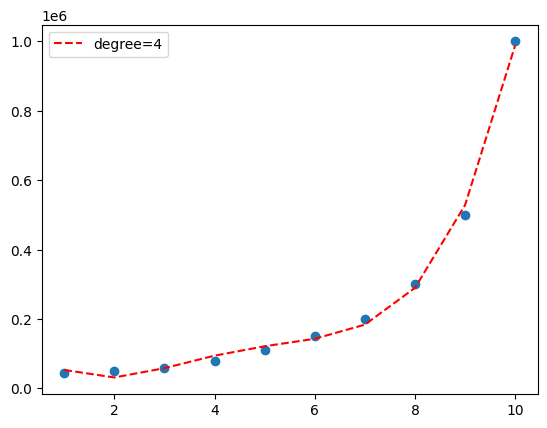

Degree=4, R2=0.9973922891706614


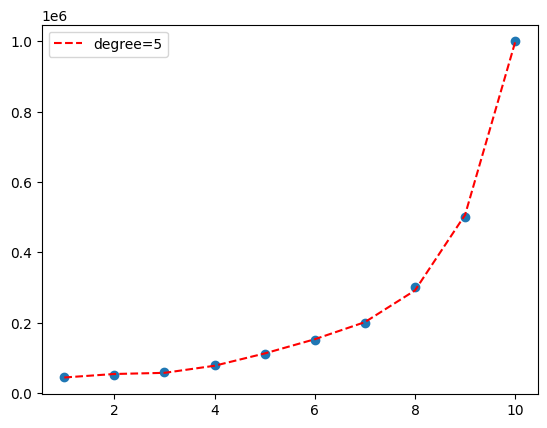

Degree=5, R2=0.9997969027099755


In [17]:
X = sm.add_constant(x, prepend=True, has_constant='skip')
model1 = sm.OLS(endog=y, exog=X).fit()

plt.scatter(x, y)
plt.plot(x, model1.fittedvalues, '--', color='red', label="degree=1")
plt.legend()
plt.show()
print("Degree=1, R2={}".format(model1.rsquared))

for i in np.arange(2, 6):
    polynomial_features = PolynomialFeatures(degree=i)
    xi = polynomial_features.fit_transform(np.array(x).reshape(-1,1))

    model= sm.OLS(endog=y, exog=xi).fit()
    
    plt.scatter(x, y)
    plt.plot(x, model.fittedvalues, '--', color='red', label="degree={}".format(i))
    plt.legend()
    plt.show()
    print("Degree={}, R2={}".format(i, model.rsquared))
    #im większy stopień wielomianu tym lepsze dopasowanie

In [18]:
#cięzko jednoznacznie stwierdzić, który stopień wielomianu wziąć, może 4, może 5 stopnia
# przydałby sie zbiór testowy (inne stanowiska z zarobkami)